# Aujourd'hui on se fait rouler par les mecs de l'ENS


https://challengedata.ens.fr/en/challenge/39/prediction_of_transaction_claims_status.html


Ici, c'est le notebook dédié à la gestion des variables corrélées. toujours en cours de travaux.

D'après : 
https://medium.com/data-design/ensembles-of-tree-based-models-why-correlated-features-do-not-trip-them-and-why-na-matters-7658f4752e1b

Et https://datascience.stackexchange.com/questions/12554/does-xgboost-handle-multicollinearity-by-itself

Il n'y a pas besoin de drop les variables colinéaires car les arbres sont immunisés contre les variables colinéaires. Ca me parrît contre intuitif, donc je vais lister ce qu'on devrait droper, mais pas le faire, je verrai sur la modélisation si ça a un impact

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python

#load packages
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

import seaborn as sns
print("seaborn version: {}". format(sns.__version__))

#misc libraries
import time
import random as rnd
import os, gc

#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)

Python version: 3.6.4 |Anaconda custom (64-bit)| (default, Mar 12 2018, 20:20:50) [MSC v.1900 64 bit (AMD64)]
pandas version: 0.22.0
matplotlib version: 2.2.2
NumPy version: 1.12.1
SciPy version: 1.0.0
IPython version: 6.2.1
scikit-learn version: 0.19.1
seaborn version: 0.8.1
-------------------------


Moi j'ai ça:

Python version: 3.6.3 |Anaconda custom (64-bit)| (default, Oct 15 2017, 03:27:45) [MSC v.1900 64 bit (AMD64)]

pandas version: 0.22.0

matplotlib version: 2.1.2

NumPy version: 1.12.1

SciPy version: 1.0.0

IPython version: 6.2.1

scikit-learn version: 0.19.1

seaborn version: 0.8.1


# Définition de la seed pour le random

Très important pour qu'on voit les mêmes choses entre nos deux ordis

In [2]:
RANDOM_SEED = 42;
np.random.seed(RANDOM_SEED)

In [3]:
# Run "! pip install jyquickhelper" dans une cellule si ca ne marche pas la commande suivante
from jyquickhelper import add_notebook_menu
add_notebook_menu()

In [4]:
# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

## Chargement des données

In [5]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
DATA_PROCESSED = os.path.join(PROJECT_ROOT_DIR, "data_processed")

def load_data(file,data_path=DATA_PROCESSED, sep=','):
    csv_path = os.path.join(data_path, file)
    return pd.read_csv(csv_path, sep)

train_df = load_data(file = "train_notebook_3.csv", sep=';');
test_df = load_data(file = "test_notebook_3.csv", sep=';');


## Analyse des types de données

In [6]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 62 columns):
SHIPPING_MODE                 100000 non-null object
SHIPPING_PRICE                100000 non-null int64
WARRANTIES_FLG                100000 non-null bool
WARRANTIES_PRICE              100000 non-null int64
CARD_PAYMENT                  100000 non-null int64
COUPON_PAYMENT                100000 non-null int64
RSP_PAYMENT                   100000 non-null int64
WALLET_PAYMENT                100000 non-null int64
PRICECLUB_STATUS              100000 non-null int64
REGISTRATION_DATE             100000 non-null int64
PURCHASE_COUNT                100000 non-null int64
BUYER_BIRTHDAY_DATE           100000 non-null float64
BUYER_DEPARTMENT              100000 non-null int64
BUYING_DATE                   100000 non-null int64
SELLER_SCORE_COUNT            100000 non-null int64
SELLER_SCORE_AVERAGE          100000 non-null float64
SELLER_COUNTRY                100000 non-null object
S

## Plan d'action

Virer les variables corrélées

In [7]:
corr_mat=train_df.select_dtypes(exclude="object").astype(float).corr(method='spearman')

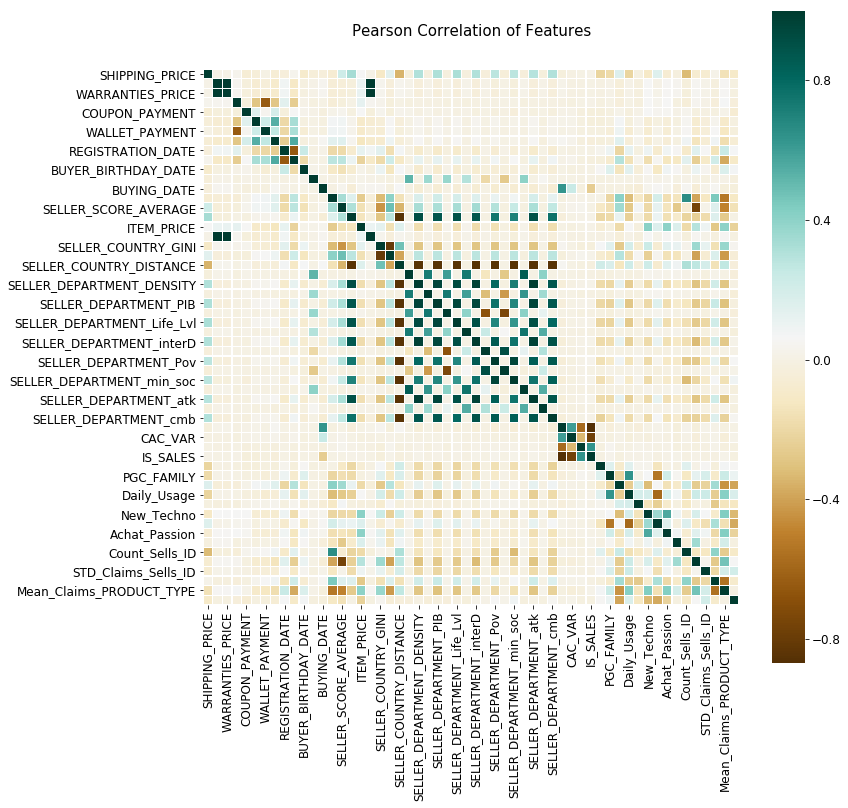

In [8]:
colormap = plt.cm.BrBG
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(corr_mat,
            linewidths=0.1,
            vmax=1.0, 
            square=True, 
            cmap=colormap, 
            linecolor='white',
            annot=False)

C'est méga joli!

Mais c'est pas bon pour l'algorithme...

Ca me rapelle ça : https://fr.wikipedia.org/wiki/Zellige

### Les corrélation à `0.9`


In [9]:
list_to_drop_at_zero_nine=[]

* SELLER_DEPARTMENT:  SELLER_DEPARTMENT_DENSITY, SELLER_DEPARTMENT_atk
* SELLER_DEPARTMENT_DENSITY:  SELLER_DEPARTMENT, SELLER_DEPARTMENT_PIB, SELLER_DEPARTMENT_Life_Lvl, SELLER_DEPARTMENT_interD,SELLER_DEPARTMENT_atk,
      
* SELLER_DEPARTMENT_PIB:  SELLER_DEPARTMENT_DENSITY, SELLER_DEPARTMENT_Life_Lvl,SELLER_DEPARTMENT_interD, SELLER_DEPARTMENT_atk,
      
* SELLER_DEPARTMENT_Life_Lvl:  SELLER_DEPARTMENT_DENSITY, SELLER_DEPARTMENT_PIB, SELLER_DEPARTMENT_interD,
      
* SELLER_DEPARTMENT_interD:  SELLER_DEPARTMENT_DENSITY, SELLER_DEPARTMENT_PIB,SELLER_DEPARTMENT_Life_Lvl, SELLER_DEPARTMENT_atk,


* BUYER_DEPARTMENT_Pov:  BUYER_DEPARTMENT_min_soc
* SELLER_DEPARTMENT_Pov:  SELLER_DEPARTMENT_min_soc
* BUYER_DEPARTMENT_min_soc:  BUYER_DEPARTMENT_Pov
* SELLER_DEPARTMENT_min_soc:  SELLER_DEPARTMENT_Pov
* SELLER_DEPARTMENT_atk:  SELLER_DEPARTMENT, SELLER_DEPARTMENT_DENSITY, SELLER_DEPARTMENT_PIB, SELLER_DEPARTMENT_interD,      

### WARRANTIES

WARRANTIES_FLG & WARRANTIES_PRICE & WARRANTY_COV_RATE

Normal, les trois une représentation différentes de la même information. On garde le taux de couverture, ça me parraît le plus cohérent

In [10]:
list_to_drop_at_zero_nine.append("WARRANTIES_FLG")
list_to_drop_at_zero_nine.append("WARRANTIES_PRICE")

### SELLER_DEPARTMENT

Corrélé a plein de variables du `Notebook 2`. Quel bazar

1. SELLER_DEPARTMENT
1. SELLER_DEPARTMENT_DENSITY
1. SELLER_DEPARTMENT_atk
1. SELLER_DEPARTMENT_PIB
1. SELLER_DEPARTMENT_Life_Lvl
1. SELLER_DEPARTMENT_interD
1. SELLER_DEPARTMENT_min_soc
1. SELLER_DEPARTMENT_Pov

In [11]:
Department_infos=[
    'SELLER_DEPARTMENT',
    'SELLER_DEPARTMENT_DENSITY',
    'SELLER_DEPARTMENT_atk',
    'SELLER_DEPARTMENT_PIB',
    'SELLER_DEPARTMENT_Life_Lvl',
    'SELLER_DEPARTMENT_interD',
    'SELLER_DEPARTMENT_min_soc',
    'SELLER_DEPARTMENT_Pov'
]

In [12]:
corr_mat=train_df[Department_infos].astype(float).corr(method='spearman')

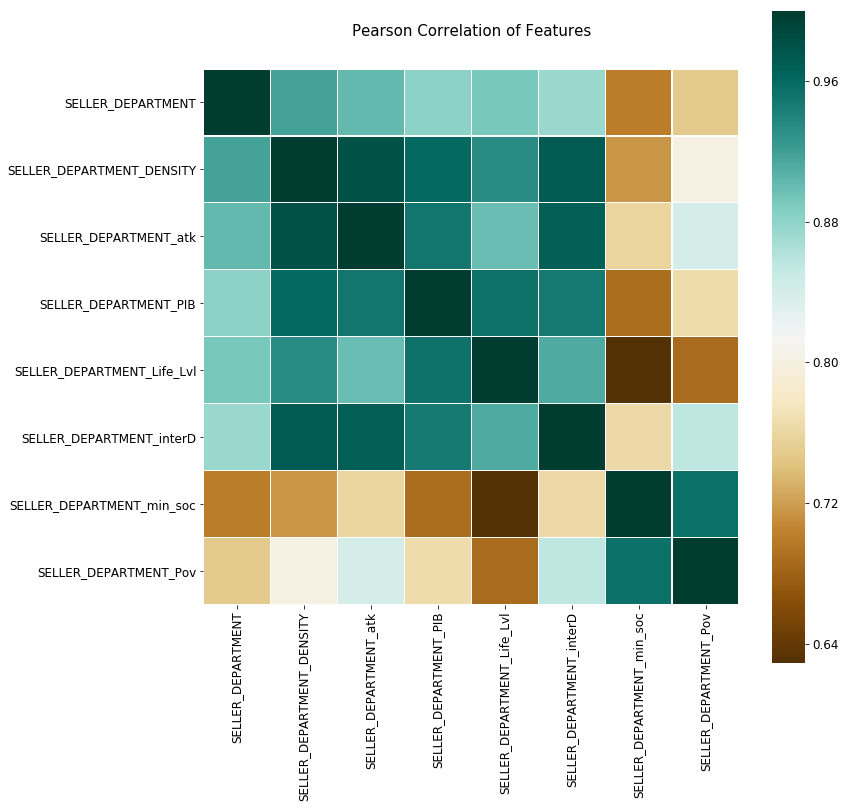

In [13]:
colormap = plt.cm.BrBG
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(corr_mat,
            linewidths=0.1,
            vmax=1.0, 
            square=True, 
            cmap=colormap, 
            linecolor='white',
            annot=False)

In [14]:
corr_level=0.9
for names in corr_mat.index:
    if len(corr_mat[(corr_mat.loc[names] > corr_level) & (corr_mat.loc[names].index != names)].index) > 0:
        print('column', names,' correlates with: ',corr_mat[(corr_mat.loc[names] > corr_level) & 
                                                                     (corr_mat.loc[names].index != names)].index)

column SELLER_DEPARTMENT  correlates with:  Index(['SELLER_DEPARTMENT_DENSITY', 'SELLER_DEPARTMENT_atk'], dtype='object')
column SELLER_DEPARTMENT_DENSITY  correlates with:  Index(['SELLER_DEPARTMENT', 'SELLER_DEPARTMENT_atk', 'SELLER_DEPARTMENT_PIB',
       'SELLER_DEPARTMENT_Life_Lvl', 'SELLER_DEPARTMENT_interD'],
      dtype='object')
column SELLER_DEPARTMENT_atk  correlates with:  Index(['SELLER_DEPARTMENT', 'SELLER_DEPARTMENT_DENSITY',
       'SELLER_DEPARTMENT_PIB', 'SELLER_DEPARTMENT_interD'],
      dtype='object')
column SELLER_DEPARTMENT_PIB  correlates with:  Index(['SELLER_DEPARTMENT_DENSITY', 'SELLER_DEPARTMENT_atk',
       'SELLER_DEPARTMENT_Life_Lvl', 'SELLER_DEPARTMENT_interD'],
      dtype='object')
column SELLER_DEPARTMENT_Life_Lvl  correlates with:  Index(['SELLER_DEPARTMENT_DENSITY', 'SELLER_DEPARTMENT_PIB',
       'SELLER_DEPARTMENT_interD'],
      dtype='object')
column SELLER_DEPARTMENT_interD  correlates with:  Index(['SELLER_DEPARTMENT_DENSITY', 'SELLER_DEPARTME

In [15]:
list_to_drop=[
    "WARRANTIES_FLG", # Sert à rien ce truc
    "WARRANTIES_PRICE", # lui pareil
    "SELLER_DEPARTMENT", # Veut pas faire croire à l'algo ue c'est une variable continue
    "BUYER_DEPARTMENT", #Pareil
    "Count_Sells_ID", # C'est trop corrélé à SELLER_SCORE_COUNT
    "SELLER_ID", # C'est un ID
    "IS_SALES", # Sert à rien
    'IS_HOLIDAYS', # sert à rien
    'CAC_POINTS', # Corrélé à deux var
    'SELLER_DEPARTMENT_Life_Lvl'
]

#train_df.drop(list_to_drop, axis=1, inplace=True)
train_df.drop("IS_CLAIM", axis=1, inplace=True)

#test_df.drop(list_to_drop, axis=1, inplace=True)

In [16]:
corr_mat=train_df.select_dtypes(exclude="object").astype(float).corr(method='spearman')

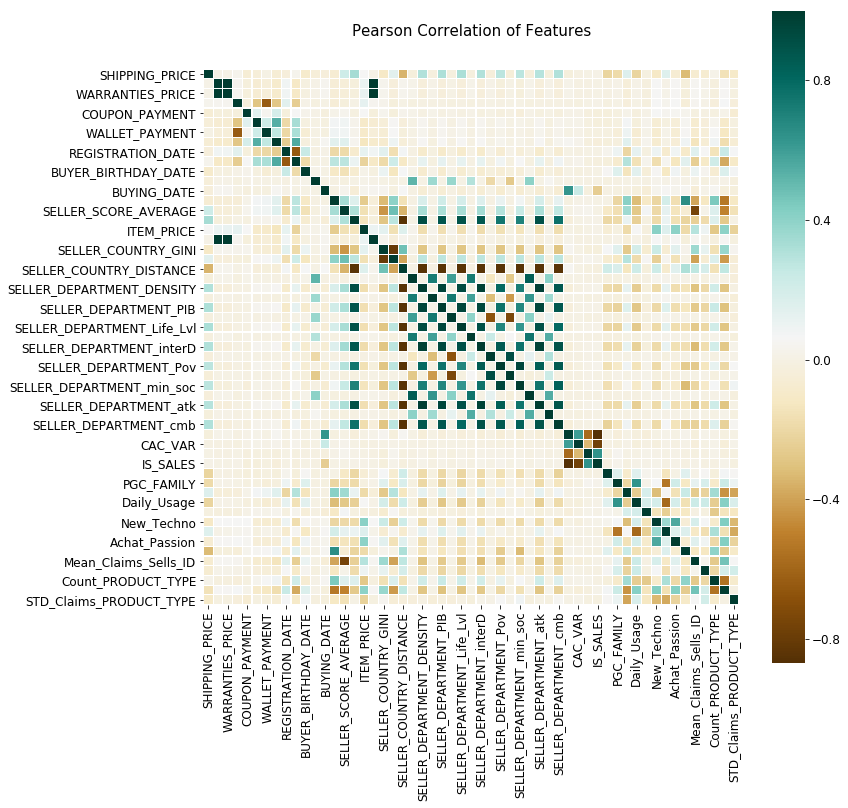

In [17]:
colormap = plt.cm.BrBG
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(corr_mat,
            linewidths=0.1,
            vmax=1.0, 
            square=True, 
            cmap=colormap, 
            linecolor='white',
            annot=False)

On inscrit nos résultats

In [18]:
filename_train = DATA_PROCESSED+"/train.csv"
filename_test = DATA_PROCESSED+"/test.csv"

try:
    os.remove(filename_train)
    os.remove(filename_test)
    os.remove(filename_train_balanced)
except:
    pass;

train_df.to_csv(filename_train, index=False, sep=";")
test_df.to_csv(filename_test, index=False, sep=";")